In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()

In [4]:
training = pd.read_csv('train.csv', index_col=0)
testing = pd.read_csv('test.csv', index_col=0)
training

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# I'm curious what would happen if I trained the model now instead of after I finished everything so I'm going to try that
# I predict it's not going to be able to make sense of data like sex and cabin and I'll get an error
# Either that or a very bad score.
from sklearn.model_selection import train_test_split
Xtest = training [['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']]
ytest = training [['Survived']]
Xtest_train, Xtest_text, ytest_train, ytest_test = train_test_split(Xtest, ytest, test_size=0.1)
from sklearn.linear_model import LinearRegression
lrtest = LinearRegression()
lrtest.fit(Xtest_train, ytest_train)

In [ ]:
# I'm leaving the error here.
# It's important to figure out why we do things the way we do.
# We can't skip straight to model building because computers can't parse information the way we do.
# In this case my computer didn't know what to do with a name. 
# I'm sure that would follow with other things too, but I've taken up enough time here.
# Now it's time to do things the way they're actually supposed to be done

In [3]:
training.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Some of the information above isn't really helpful.
# No one 38% survived.
# Things like survival and class aren't numbers we can average. They're categorical.
# Other things like Age and Fare can tell us more. They're numerical.
# Let's separate numerical and categorical data so we can get rid of some of the noise
numdata = training[['Age','SibSp','Parch','Fare']]
catdata = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [5]:
numdata.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [6]:
# So the average age on the Titanic was a little more than twenty-nine and a half.
# The youngest kid wasn't even a year old.
# And the oldest person was 80.
# Most people didn't have a sibling or spouse on board.
# But at least one person had eight siblings (or spouses, but hopefully siblings).
# All interesting data.
# Let's look at some more number-based data.
training [["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [7]:
# So the average age on the Titanic was a little higher for men than women.
training.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [8]:
# So women across the board paid more regardless of which class they were in.
# Which is interesting, though maybe not important for our goal
training ["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
# So most of the passengers did not have a spouse or sibling onboard
# Of those that did most only had one.
# There were five people who had five spouses or siblings - hopefully siblings.
training.groupby(["SibSp", "Pclass"])["Age"].mean()

SibSp  Pclass
0      1         39.181416
       2         31.934220
       3         27.630201
1      1         37.414154
       2         27.363636
       3         24.912698
2      1         37.200000
       2         19.125000
       3         18.875000
3      1         22.000000
       2         30.000000
       3          8.875000
4      3          7.055556
5      3         10.200000
8      3               NaN
Name: Age, dtype: float64

In [10]:
# So it looks like the average ages for people with no siblings or spouse onboard were older than those with.
# And there was no one in first or second class with more than three siblings or a sibling/spouse combo of more than three.
training ["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

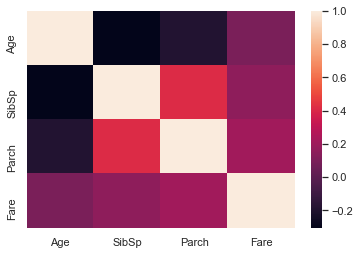

In [11]:
# So most people didn't have a parent or child onboard
print(numdata.corr())
sns.heatmap(numdata.corr())

In [12]:
# This is ripped straight from Ken Jee's tutorial.
# It has the desired effect of getting rid of the name (something we proved earlier doesn't parse)
# And in turn making something parsable, ie Title.
training['Title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
Don               1
Jonkheer          1
Sir               1
Capt              1
Ms                1
the Countess      1
Lady              1
Name: Title, dtype: int64

In [13]:
training['Multiple Cabins'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['Multiple Cabins'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Multiple Cabins, dtype: int64

In [14]:
training['CabinDeck'] = training.Cabin.apply(lambda x: str(x)[0])
print(training.CabinDeck.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinDeck, dtype: int64


In [15]:
training [training ["Name"].str.contains("Lee")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Multiple Cabins,CabinDeck
PassengerId,,,,,,,,,,,,,,
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Mr,0,n
170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Mr,0,n
554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C,Mr,0,n


In [16]:
# The below information was gathered from the Data School Youtube channel and his November 2019 video.
# Located here: https://www.youtube.com/watch?v=irHhDMbw3xo
# And his Github, justmarkham, located here:
# https://github.com/justmarkham/scikit-learn-videos/blob/master/10_categorical_features.ipynb
# Thank God for his work and for him. Because without him I would still be lost.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [17]:
training.dropna(subset=['Embarked'],inplace = True)

In [18]:
training.Age.fillna(training.Age.mean())

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.642093
890    26.000000
891    32.000000
Name: Age, Length: 889, dtype: float64

In [19]:
ohe.fit_transform(training[['Sex']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [20]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [21]:
ohe.fit_transform(training[['Embarked']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [22]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [23]:
ohe.fit_transform(training[['Title']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
ohe.categories_

[array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
        'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
        'the Countess'], dtype=object)]

In [25]:
ohe.fit_transform(training[['Multiple Cabins']])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [26]:
ohe.categories_

[array([0, 1, 2, 3, 4], dtype=int64)]

In [27]:
ohe.fit_transform(training[['CabinDeck']])

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
ohe.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'], dtype=object)]

In [29]:
# What I need to do:
# Drop nan from embarked !!
# Fill nan from age with mean or median !!
# I don't think I'm going to use fare, at least not immediately so that can be left alone.
#
# Make Title, Multiple Cabins, and CabinDeck columns for test data !!
# Drop nan from embarked
# Transform the nan ages in the test data

In [30]:
testing['Title'] = testing.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
testing['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [31]:
testing['Multiple Cabins'] = testing.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
testing['Multiple Cabins'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: Multiple Cabins, dtype: int64

In [32]:
testing['CabinDeck'] = testing.Cabin.apply(lambda x: str(x)[0])
print(testing.CabinDeck.value_counts())

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: CabinDeck, dtype: int64


In [33]:
testing [testing ["Name"].str.contains("Leo")]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Multiple Cabins,CabinDeck
PassengerId,,,,,,,,,,,,,
993,2,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,NaN,S,Mr,0,n
1242,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0,1,PC 17759,63.3583,D10 D12,C,Mrs,2,D
1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0,0,1,112378,59.4000,NaN,C,Mrs,0,n


In [34]:
testing.dropna(subset=['Embarked'],inplace = True)

In [35]:
testing.Age.fillna(testing.Age.mean())

PassengerId
892     34.50000
893     47.00000
894     62.00000
895     27.00000
896     22.00000
          ...   
1305    30.27259
1306    39.00000
1307    38.50000
1308    30.27259
1309    30.27259
Name: Age, Length: 418, dtype: float64

In [36]:
ohe.fit_transform(testing[['Sex']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [37]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [38]:
ohe.fit_transform(testing[['Embarked']])

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [39]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [40]:
ohe.fit_transform(testing[['Title']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
ohe.categories_

[array(['Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'],
       dtype=object)]

In [42]:
ohe.fit_transform(testing[['Multiple Cabins']])

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [43]:
ohe.categories_

[array([0, 1, 2, 3, 4], dtype=int64)]

In [44]:
ohe.fit_transform(testing[['CabinDeck']])

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
ohe.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'n'], dtype=object)]

In [46]:
training [training ["Name"].str.contains("Anthony")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Multiple Cabins,CabinDeck
PassengerId,,,,,,,,,,,,,,
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.00,NaN,S,Mr,0,n
846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,Mr,0,n


In [47]:
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked', 'Title', 'Multiple Cabins', 'CabinDeck']),
    remainder='passthrough')

In [48]:
column_trans.fit_transform(training)

array([[0.0, 1.0, 0.0, ..., 'A/5 21171', 7.25, nan],
       [1.0, 0.0, 1.0, ..., 'PC 17599', 71.2833, 'C85'],
       [1.0, 0.0, 0.0, ..., 'STON/O2. 3101282', 7.925, nan],
       ...,
       [1.0, 0.0, 0.0, ..., 'W./C. 6607', 23.45, nan],
       [0.0, 1.0, 1.0, ..., '111369', 30.0, 'C148'],
       [0.0, 1.0, 0.0, ..., '370376', 7.75, nan]], dtype=object)

In [49]:
training = training.loc[training.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 
                                                    'Multiple Cabins', 'CabinDeck']]

In [50]:
X = training.loc[:, ['Pclass']]
y = training.Survived

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [52]:
logreg = LogisticRegression()

In [53]:
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.6783406335301212